In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import nbconvert
from functools import reduce

In [ ]:
ativos01 = ['ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA']
inicio = '2020-01-05'
fim = '2021-12-05'
precos = yf.download(ativos01, start = inicio, end = fim)['Adj Close']
precos.head()

[*********************100%***********************]  12 of 12 completed


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,,,
2020-01-06,17.749456,12.885548,45.145222,25.291559,18.029217,16.555410,34.274559,54.075039,11.932190,16.725143,47.087105,40.047947
2020-01-07,17.786785,13.301308,44.804504,24.852192,18.101147,16.853851,33.479393,54.046600,11.898049,16.660000,47.545017,40.339283
2020-01-08,17.702797,13.265672,44.395641,24.467737,17.940729,16.575916,32.933903,54.397305,12.263844,16.556858,47.311184,40.346752
2020-01-09,17.562817,13.259731,43.492741,24.076418,18.062840,16.398218,32.277431,53.980251,12.700356,16.502575,47.564503,39.816364
2020-01-10,17.628139,13.155791,42.470585,23.637043,18.316639,16.641979,31.990820,54.150860,12.632074,16.432005,46.619434,39.861187


In [ ]:
compras = {'ITUB4.SA': 1200, 'VALE3.SA': 1200, 'MGLU3.SA': 1000,
           'PETR4.SA': 1000, 'BBDC4.SA': 1000, 'B3SA3.SA': 900, 
           'ABEV3.SA': 800, 'BPAC11.SA': 700, 'BBAS3.SA': 600, 
           'CSAN3.SA': 600, 'RENT3.SA': 500, 'LREN3.SA':500}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))
sum(compras.values())
precos.iloc[0]
PL01 = precos*compras_df/(precos.iloc[0])
PL01['Carteira 01'] = PL01.sum(axis = 1)
PL01.tail()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2021-11-29,708.810813,770.903342,388.793751,705.337328,816.612014,732.976981,778.319976,262.743090,673.807574,1047.664034,547.560185,1906.585362,9340.114452
2021-11-30,696.664703,744.759632,401.791382,692.810388,783.249885,725.128485,768.702541,258.294430,653.693935,1046.242173,535.613470,1918.930070,9225.881093
2021-12-01,687.988934,738.056131,394.977105,690.026539,787.041029,724.104798,763.809248,256.841795,576.591569,1052.285651,528.277726,1926.611521,9126.612046
2021-12-02,694.495782,768.221888,405.829483,725.169590,791.969576,748.673835,792.684257,259.747047,566.534749,1132.575844,562.965251,2016.042667,9464.909969
2021-12-03,694.061989,779.617867,406.334268,723.079630,799.930875,763.347071,789.934167,265.557516,590.838750,1148.549994,574.912007,1971.601538,9507.765673


In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']

precos02 = yf.download(ativos02, start = inicio, end = fim)['Adj Close']

compras02 = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 'TSLA34.SA': 500}
           
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

PL02 = precos02*(compras_df02/(precos02.iloc[0]))

PL02['Carteira 02'] = PL02.sum(axis = 1)

precos02.head()
sum(compras02.values())
PL02.head()

[*********************100%***********************]  10 of 10 completed


,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,Carteira 02
Date,,,,,,,,,,,
2020-01-06,700.000000,1100.000000,1500.000000,500.0,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000
2020-01-07,701.718775,1104.388594,1498.708017,500.0,1003.889383,801.725307,1205.042813,522.959854,1410.184688,1310.063003,10058.680435
2020-01-08,707.619831,1094.600837,1485.788188,500.0,947.065321,794.823815,1188.871047,529.412442,1410.445797,1260.493183,9919.120461
2020-01-09,728.760771,1102.051277,1485.788188,500.0,914.233767,798.274605,1208.520535,529.412442,1391.904578,1241.857715,9900.803878
2020-01-10,731.854574,1117.535990,1475.452063,500.0,903.626612,801.725307,1199.478438,531.012000,1393.471360,1267.201999,9921.358345


In [ ]:
ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
            'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

precos03 = yf.download(ativos03, start = inicio, end = fim)['Adj Close']

compras03 = {'IVVB11.SA': 1500, 'GOGL34.SA': 1500, 'COCA34.SA': 1000, 
           'MSFT34.SA': 1000, 'WEGE3.SA': 1000, 'VALE3.SA': 1000, 
           'PETR4.SA': 1000, 'SUZB3.SA': 1000, 'JBSS3.SA':1000}
           
compras_df03 = pd.Series(data=compras03, index=list(compras03.keys()))

PL03 = precos03*(compras_df03/(precos03.iloc[0]))

PL03['Carteira 03'] = PL03.sum(axis = 1)

PL03.head()

[*********************100%***********************]  9 of 9 completed


,COCA34.SA,GOGL34.SA,IVVB11.SA,JBSS3.SA,MSFT34.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,Carteira 03
Date,,,,,,,,,,
2020-01-06,1000.00000,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2020-01-07,1000.00000,1504.675475,1500.0,1017.896996,993.784174,996.105165,1012.814006,1007.274777,1007.740772,10040.291365
2020-01-08,999.50479,1509.218888,1500.0,1042.878423,1007.437451,989.938295,1063.331692,1007.461283,969.610025,10089.380847
2020-01-09,999.50479,1534.240348,1500.0,1055.555644,1020.858770,986.692694,1060.620914,994.217460,955.275273,10106.965894
2020-01-10,1025.21968,1550.570694,1500.0,1049.962770,1029.023085,982.473184,1062.345954,995.336686,974.770879,10169.702933


In [ ]:
from functools import reduce

dfs = [PL01, PL02, PL03, ibov]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
df_final.head()
df_final_normalizado = df_final/df_final.iloc[0]

NameError: ignored

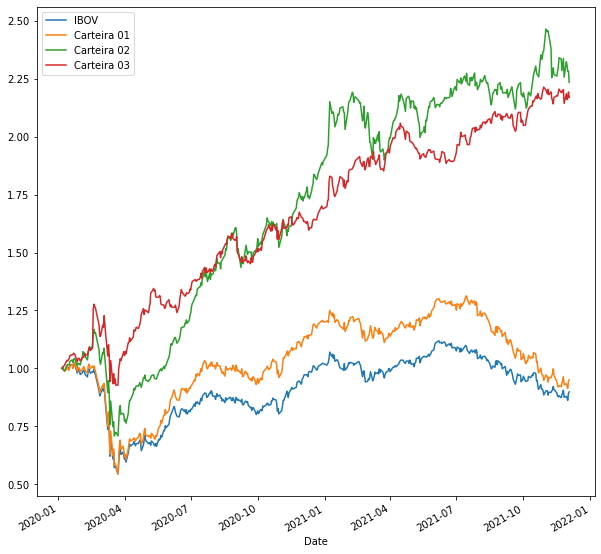

In [ ]:
import matplotlib.pyplot as plt

df_final_normalizado['Date'] = df_final_normalizado.index

df_final_normalizado.plot(x = 'Date', y = ['IBOV', 'Carteira 01', 'Carteira 02', 'Carteira 03'], kind = 'line', figsize= (10,10))

plt.text(0.8, 1, 'Trading com Dados', transform=ax.transAxes,
        fontsize=60, color='gray', alpha=0.2,
        ha='center', va='center', rotation='30')

plt.show()